# Classify Irises

In this laboration we will try to build a neural net to identify what type of Iris a flower is. We will also evaluate the Artificial Neural Net by comparing it to other methods.

The dataset is a classical dataset in machinelearning collected in 1936 by Edgar Anderson and first published by Ronald Fisher. By measuring the sepal width, sepal length, petal width and petal length Fisher tried to specify differences between the spicies.

This is a simple example and often used when teaching ML algorithms. Since it contains of a reasonable amount of parameters it is easy to understand the data. It is also very good in the sense that there are some overlaps that might be very hard to detect accuratly. It therefor illustrates the complexity of building an AI that that has an accuracy of 100%.


![alt text](https://cdn-images-1.medium.com/max/2560/1*7bnLKsChXq94QjtAiRn40w.png "Three types of Irises the we want to classify.")

As you see those flowers are quite similar. Compared to a botanist the NN might not be perfect. But compared to someone who tries to identify the flower based on a flower book it might be quite accurate. Let's see how to do it.

In [1]:
# First we load all libraries needed for this notebook
 
import pandas as pd # Load the Pandas libraries with alias 'pd'
import tensorflow as tf # A library developed by google making GPU calculations simple
import seaborn as sns # A nice library for plotting, alternative to matplotlib
from matplotlib import pyplot as plt # Another plotting library

from sklearn.preprocessing import normalize #
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [2]:
# Read data from file iris.csv' from the data folder
# Open the csv to see the data
data = pd.read_csv("./data/iris.csv") 
# Preview the first 10 lines of the loaded data 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the data
Before starting to do any modifications of the data or attempts to build some kind of AI/ML model. We must understand the data. This explorative phase is very important in order to succesful build a model. By understanding the data we might be able to improve the dataset.

One method in the pandas.DataFrame class is the `describe` method which shows some statistical information about each column.

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


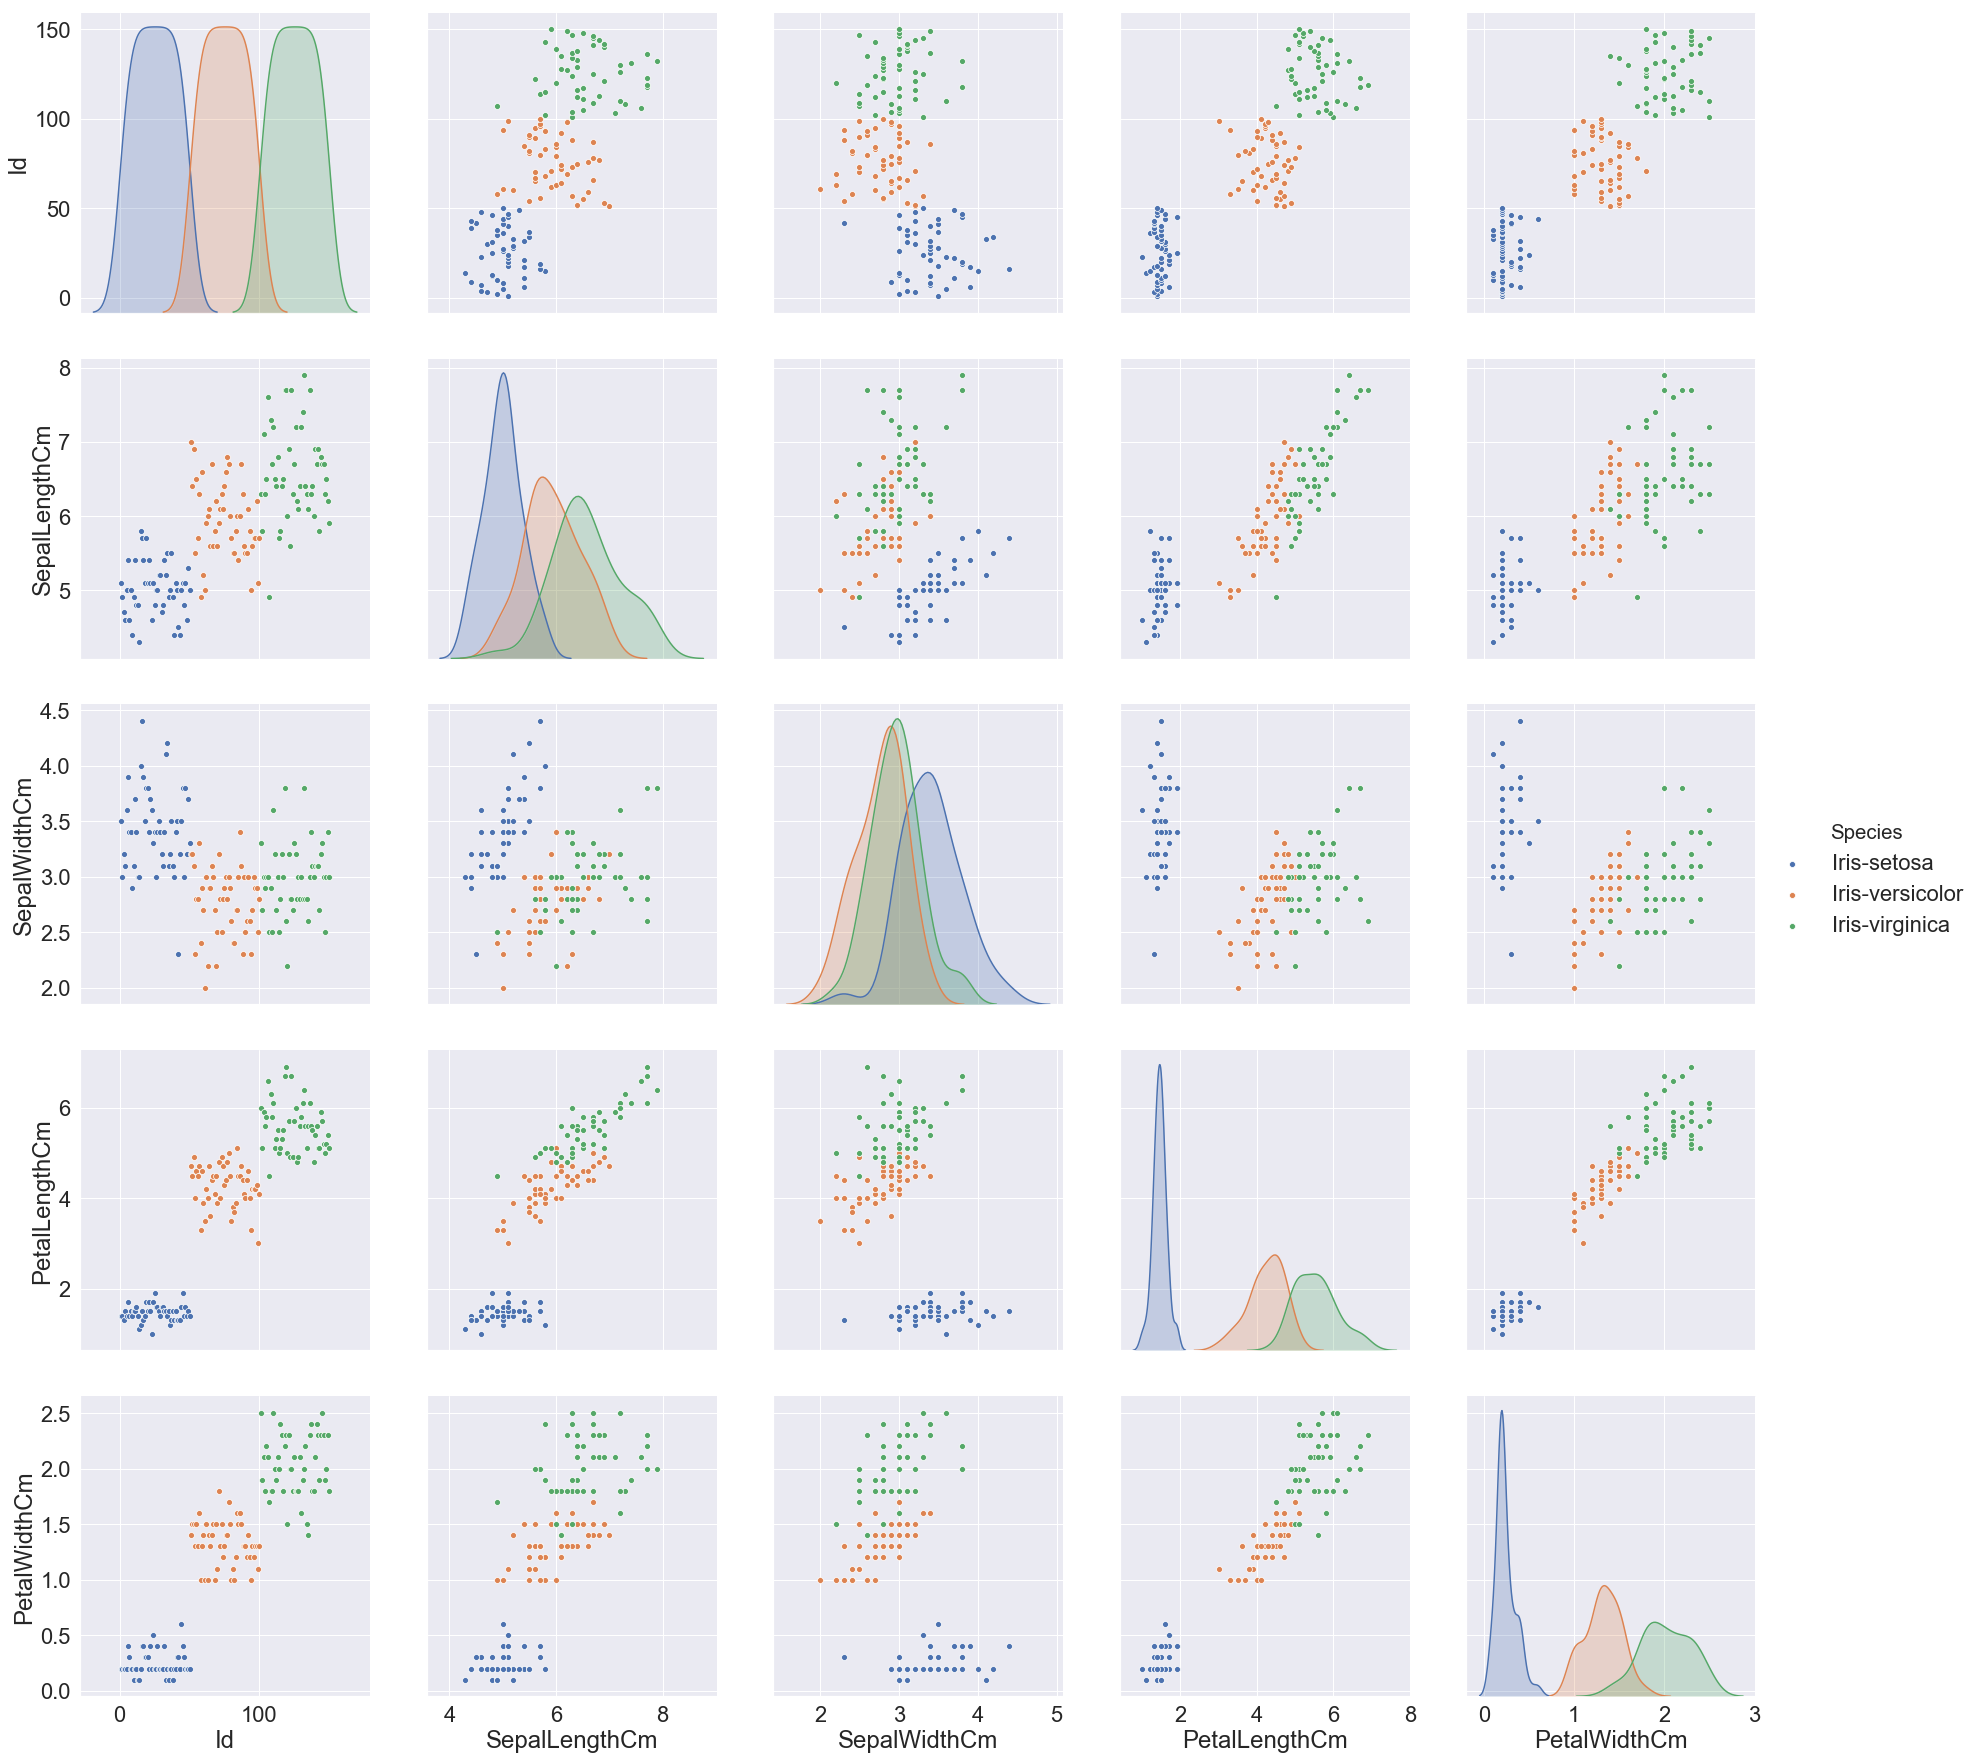

In [4]:
cols=data.columns
sns.set(font_scale=2)
sns.pairplot(vars=cols[:-1], data=data, hue='Species', height=5)
plt.show()

### Delete data
By reading the data we can se that the parameter "Id" has a very strong correlation with the type of Iris. This is a pure artificial correlation existing only because of the structure of the data.

Id should therefor be deleted. One way to do this is with the `pop` method included in the dataframe class.


In [5]:
try:
    data.pop('Id')
except:
    print('Id already deleted')
data.head(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


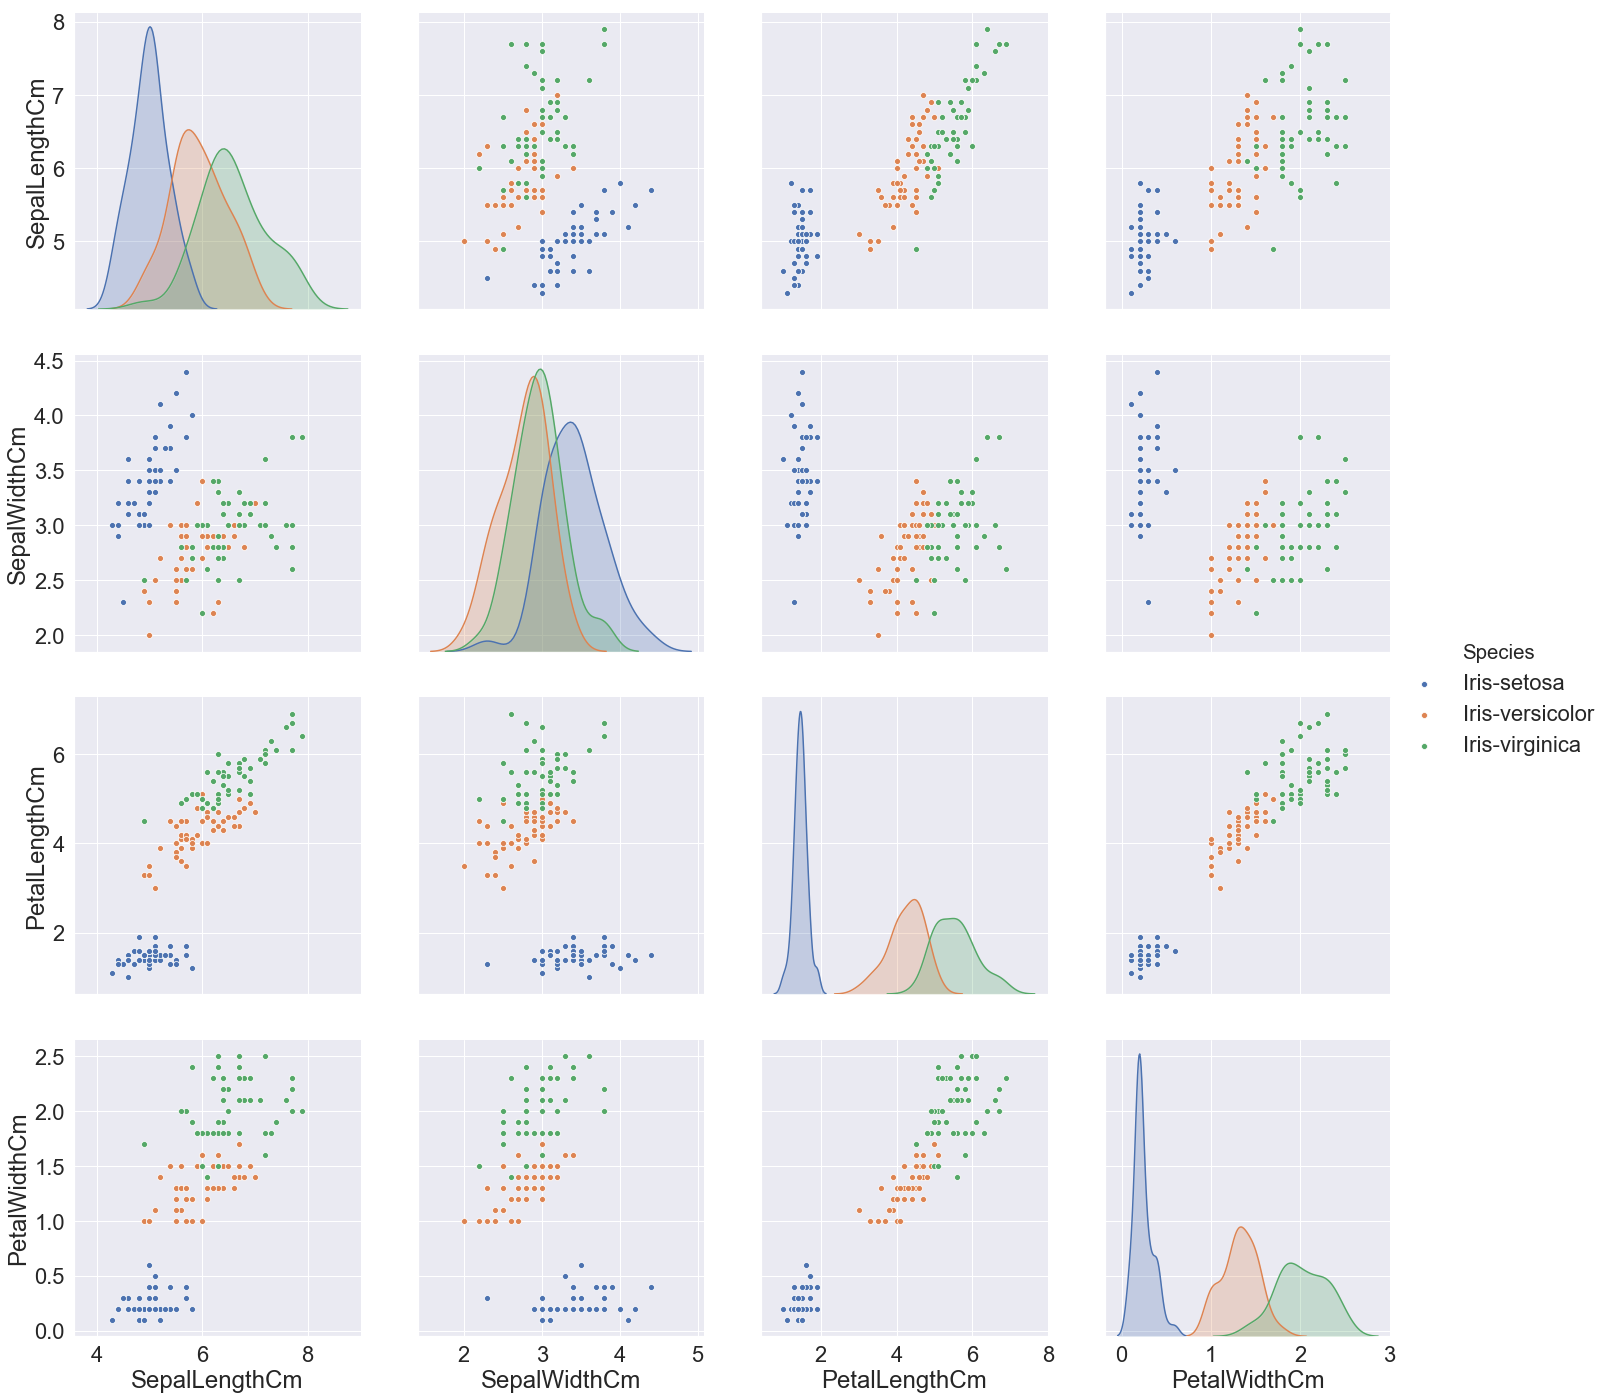

In [6]:
sns.pairplot(vars=cols[1:-1], data=data, hue='Species', height=5)
plt.show()

# Correlation of data
One method to analyze how well one variable describes another variable is by correlations.

$\rho(x,y)=\frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}$

The correlation is a method included in the dataframe `corr`. 

In [7]:
# Write the syntax here:
corr = data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


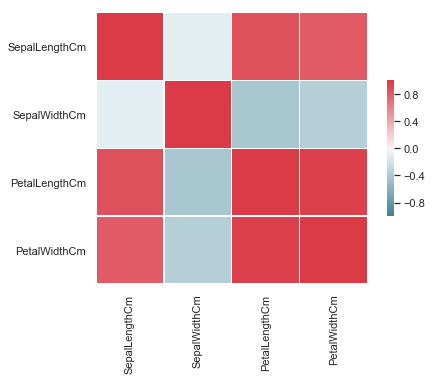

In [8]:
import numpy as np
# Set up the matplotlib figure
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1,vmin=-1, center=0,# mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the the figure and table aboove we can see that two of the variables are well correlated. That means it is quite likely that two of the well correlated variables could be deleted without impacting the accuracy of the model.


In [9]:
# Shuffle the data each time 
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_normalized = normalize(X,axis=0)

total_length = len(data)
train_length = int(0.8*total_length)
test_length = int(0.2*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

le = preprocessing.LabelEncoder()
le.fit(y_train)
train_label = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(train_label,num_classes=3)

le2 = preprocessing.LabelEncoder()
le2.fit(y_test)
test_label = le2.transform(y_test)
y_test=tf.keras.utils.to_categorical(test_label,num_classes=3)



In [10]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 2ms/sample - loss: 1.0910 - acc: 0.5083 - val_loss: 1.0775 - val_acc: 0.7667
Epoch 2/300
120/120 [==============================] - 0s 112us/sample - loss: 1.0756 - acc: 0.6417 - val_loss: 1.0658 - val_acc: 0.9000
Epoch 3/300
120/120 [==============================] - 0s 125us/sample - loss: 1.0630 - acc: 0.7333 - val_loss: 1.0544 - val_acc: 0.6000
Epoch 4/300
120/120 [==============================] - 0s 100us/sample - loss: 1.0495 - acc: 0.6667 - val_loss: 1.0434 - val_acc: 0.5667
Epoch 5/300
120/120 [==============================] - 0s 133us/sample - loss: 1.0308 - acc: 0.6750 - val_loss: 1.0189 - val_acc: 0.7667
Epoch 6/300
120/120 [==============================] - 0s 133us/sample - loss: 1.0076 - acc: 0.9083 - val_loss: 0.9898 - val_acc: 0.9333
Epoch 7/300
120/120 [==============================] - 0s 116us/sample - loss: 0.9800 - acc: 0.9833 - val_loss: 0.9579 - val_acc: 0.933

120/120 [==============================] - 0s 108us/sample - loss: 0.0851 - acc: 0.9917 - val_loss: 0.1700 - val_acc: 0.9000
Epoch 61/300
120/120 [==============================] - 0s 133us/sample - loss: 0.0802 - acc: 0.9833 - val_loss: 0.1465 - val_acc: 0.8667
Epoch 62/300
120/120 [==============================] - 0s 125us/sample - loss: 0.0812 - acc: 0.9833 - val_loss: 0.1435 - val_acc: 0.8667
Epoch 63/300
120/120 [==============================] - 0s 125us/sample - loss: 0.0793 - acc: 0.9750 - val_loss: 0.1786 - val_acc: 0.9000
Epoch 64/300
120/120 [==============================] - 0s 116us/sample - loss: 0.0778 - acc: 0.9750 - val_loss: 0.1417 - val_acc: 0.8667
Epoch 65/300
120/120 [==============================] - 0s 125us/sample - loss: 0.0759 - acc: 0.9750 - val_loss: 0.1441 - val_acc: 0.8667
Epoch 66/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0779 - acc: 0.9750 - val_loss: 0.1596 - val_acc: 0.9000
Epoch 67/300
120/120 [=========================

120/120 [==============================] - 0s 91us/sample - loss: 0.0504 - acc: 0.9833 - val_loss: 0.1589 - val_acc: 0.9000
Epoch 120/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0523 - acc: 0.9750 - val_loss: 0.1168 - val_acc: 0.9333
Epoch 121/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0522 - acc: 0.9750 - val_loss: 0.1666 - val_acc: 0.9000
Epoch 122/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0466 - acc: 0.9750 - val_loss: 0.1408 - val_acc: 0.8667
Epoch 123/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0477 - acc: 0.9833 - val_loss: 0.1338 - val_acc: 0.9000
Epoch 124/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0446 - acc: 0.9750 - val_loss: 0.1720 - val_acc: 0.9000
Epoch 125/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0496 - acc: 0.9833 - val_loss: 0.1696 - val_acc: 0.9000
Epoch 126/300
120/120 [=======================

Epoch 178/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0471 - acc: 0.9750 - val_loss: 0.1492 - val_acc: 0.8667
Epoch 179/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0370 - acc: 0.9750 - val_loss: 0.1476 - val_acc: 0.8667
Epoch 180/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0374 - acc: 0.9833 - val_loss: 0.1437 - val_acc: 0.8667
Epoch 181/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0395 - acc: 0.9750 - val_loss: 0.1539 - val_acc: 0.8667
Epoch 182/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0370 - acc: 0.9833 - val_loss: 0.1426 - val_acc: 0.9000
Epoch 183/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0385 - acc: 0.9833 - val_loss: 0.1376 - val_acc: 0.9000
Epoch 184/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0375 - acc: 0.9750 - val_loss: 0.1409 - val_acc: 0.9000
Epoch 185/300
120/120 [=======

120/120 [==============================] - 0s 91us/sample - loss: 0.0345 - acc: 0.9833 - val_loss: 0.1550 - val_acc: 0.8667
Epoch 238/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0375 - acc: 0.9833 - val_loss: 0.1750 - val_acc: 0.9000
Epoch 239/300
120/120 [==============================] - 0s 98us/sample - loss: 0.0320 - acc: 0.9833 - val_loss: 0.1156 - val_acc: 0.9333
Epoch 240/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0370 - acc: 0.9833 - val_loss: 0.1572 - val_acc: 0.8667
Epoch 241/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0354 - acc: 0.9917 - val_loss: 0.1460 - val_acc: 0.9000
Epoch 242/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0322 - acc: 0.9917 - val_loss: 0.1479 - val_acc: 0.9000
Epoch 243/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0351 - acc: 0.9833 - val_loss: 0.1319 - val_acc: 0.9000
Epoch 244/300
120/120 [========================

120/120 [==============================] - 0s 108us/sample - loss: 0.0296 - acc: 0.9833 - val_loss: 0.1473 - val_acc: 0.9000
Epoch 297/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0317 - acc: 0.9833 - val_loss: 0.1825 - val_acc: 0.9000
Epoch 298/300
120/120 [==============================] - 0s 116us/sample - loss: 0.0299 - acc: 0.9833 - val_loss: 0.1300 - val_acc: 0.9000
Epoch 299/300
120/120 [==============================] - 0s 116us/sample - loss: 0.0315 - acc: 0.9833 - val_loss: 0.1742 - val_acc: 0.9000
Epoch 300/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0294 - acc: 1.0000 - val_loss: 0.1584 - val_acc: 0.9000


#### Validate results
By looking output from the model fit. We can se that the accuracy of training data keeps raising throuout the process of finding constants for each neuron in the net. However looking att the accuracy of the validation set there is some kind of maximum after quite few iteration. 

We can for a reasonable high amount epochs by plotting the history of the accuracy and loss. What is a reasonable amount of epochs?

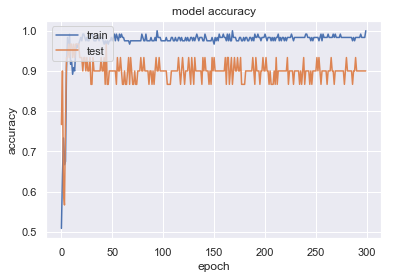

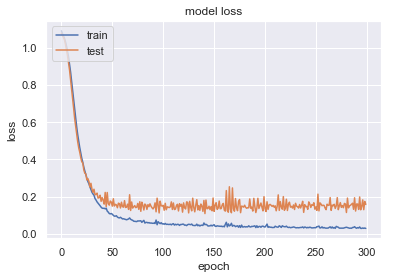

In [11]:
# summarize history for accuracy
sns.set(font_scale=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Better net?
In the example above there are quite a lot of neurons in each layer of the net. What happens if we follow the rule of thumb and use somewhere between the amount of outputs classes and number of input variables in each layer? 

Do we see any diffrence in the loss and what happens to the accuracy? 

In [12]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(4,input_dim=4,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(3,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=500,verbose=1)


Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 2ms/sample - loss: 1.0820 - acc: 0.3583 - val_loss: 1.0815 - val_acc: 0.2333
Epoch 2/500
120/120 [==============================] - 0s 91us/sample - loss: 1.0756 - acc: 0.3583 - val_loss: 1.0808 - val_acc: 0.2333
Epoch 3/500
120/120 [==============================] - 0s 100us/sample - loss: 1.0760 - acc: 0.3583 - val_loss: 1.0802 - val_acc: 0.2333
Epoch 4/500
120/120 [==============================] - 0s 108us/sample - loss: 1.0728 - acc: 0.3750 - val_loss: 1.0796 - val_acc: 0.2333
Epoch 5/500
120/120 [==============================] - 0s 108us/sample - loss: 1.0730 - acc: 0.3500 - val_loss: 1.0792 - val_acc: 0.2333
Epoch 6/500
120/120 [==============================] - 0s 116us/sample - loss: 1.0759 - acc: 0.3667 - val_loss: 1.0789 - val_acc: 0.2333
Epoch 7/500
120/120 [==============================] - 0s 116us/sample - loss: 1.0735 - acc: 0.3667 - val_loss: 1.0783 - val_acc: 0.2333

120/120 [==============================] - 0s 91us/sample - loss: 1.0204 - acc: 0.6833 - val_loss: 1.0298 - val_acc: 0.5667
Epoch 61/500
120/120 [==============================] - 0s 91us/sample - loss: 1.0172 - acc: 0.6833 - val_loss: 1.0286 - val_acc: 0.5667
Epoch 62/500
120/120 [==============================] - 0s 83us/sample - loss: 1.0192 - acc: 0.6583 - val_loss: 1.0272 - val_acc: 0.5667
Epoch 63/500
120/120 [==============================] - 0s 100us/sample - loss: 1.0160 - acc: 0.6750 - val_loss: 1.0257 - val_acc: 0.5667
Epoch 64/500
120/120 [==============================] - 0s 108us/sample - loss: 1.0104 - acc: 0.6750 - val_loss: 1.0243 - val_acc: 0.5667
Epoch 65/500
120/120 [==============================] - 0s 116us/sample - loss: 1.0085 - acc: 0.6833 - val_loss: 1.0229 - val_acc: 0.5667
Epoch 66/500
120/120 [==============================] - 0s 83us/sample - loss: 1.0113 - acc: 0.6667 - val_loss: 1.0215 - val_acc: 0.5667
Epoch 67/500
120/120 [=============================

120/120 [==============================] - 0s 75us/sample - loss: 0.9207 - acc: 0.7417 - val_loss: 0.9210 - val_acc: 0.5667
Epoch 120/500
120/120 [==============================] - 0s 75us/sample - loss: 0.9217 - acc: 0.7250 - val_loss: 0.9189 - val_acc: 0.5667
Epoch 121/500
120/120 [==============================] - 0s 91us/sample - loss: 0.9193 - acc: 0.6917 - val_loss: 0.9169 - val_acc: 0.5667
Epoch 122/500
120/120 [==============================] - 0s 91us/sample - loss: 0.9243 - acc: 0.7583 - val_loss: 0.9145 - val_acc: 0.5667
Epoch 123/500
120/120 [==============================] - 0s 75us/sample - loss: 0.9015 - acc: 0.7667 - val_loss: 0.9124 - val_acc: 0.5667
Epoch 124/500
120/120 [==============================] - 0s 83us/sample - loss: 0.9137 - acc: 0.7167 - val_loss: 0.9102 - val_acc: 0.5667
Epoch 125/500
120/120 [==============================] - 0s 83us/sample - loss: 0.9048 - acc: 0.7083 - val_loss: 0.9079 - val_acc: 0.5667
Epoch 126/500
120/120 [=========================

120/120 [==============================] - 0s 116us/sample - loss: 0.7973 - acc: 0.7917 - val_loss: 0.7999 - val_acc: 0.9000
Epoch 179/500
120/120 [==============================] - 0s 127us/sample - loss: 0.8328 - acc: 0.7500 - val_loss: 0.7981 - val_acc: 0.9000
Epoch 180/500
120/120 [==============================] - 0s 108us/sample - loss: 0.8039 - acc: 0.7833 - val_loss: 0.7962 - val_acc: 0.9000
Epoch 181/500
120/120 [==============================] - 0s 125us/sample - loss: 0.8163 - acc: 0.7750 - val_loss: 0.7945 - val_acc: 0.9000
Epoch 182/500
120/120 [==============================] - 0s 116us/sample - loss: 0.8137 - acc: 0.7500 - val_loss: 0.7924 - val_acc: 0.8667
Epoch 183/500
120/120 [==============================] - 0s 108us/sample - loss: 0.8016 - acc: 0.7833 - val_loss: 0.7905 - val_acc: 0.8667
Epoch 184/500
120/120 [==============================] - 0s 125us/sample - loss: 0.7915 - acc: 0.8167 - val_loss: 0.7886 - val_acc: 0.8667
Epoch 185/500
120/120 [==================

120/120 [==============================] - 0s 83us/sample - loss: 0.7505 - acc: 0.6750 - val_loss: 0.6988 - val_acc: 0.9333
Epoch 238/500
120/120 [==============================] - 0s 91us/sample - loss: 0.7279 - acc: 0.7167 - val_loss: 0.6972 - val_acc: 0.9333
Epoch 239/500
120/120 [==============================] - 0s 108us/sample - loss: 0.7208 - acc: 0.7167 - val_loss: 0.6959 - val_acc: 0.9333
Epoch 240/500
120/120 [==============================] - 0s 75us/sample - loss: 0.7225 - acc: 0.7000 - val_loss: 0.6946 - val_acc: 0.9333
Epoch 241/500
120/120 [==============================] - 0s 75us/sample - loss: 0.7314 - acc: 0.7000 - val_loss: 0.6934 - val_acc: 0.9333
Epoch 242/500
120/120 [==============================] - 0s 75us/sample - loss: 0.7277 - acc: 0.7917 - val_loss: 0.6918 - val_acc: 0.9333
Epoch 243/500
120/120 [==============================] - 0s 83us/sample - loss: 0.7096 - acc: 0.7000 - val_loss: 0.6895 - val_acc: 0.9333
Epoch 244/500
120/120 [========================

120/120 [==============================] - 0s 87us/sample - loss: 0.6770 - acc: 0.7167 - val_loss: 0.6243 - val_acc: 0.9333
Epoch 297/500
120/120 [==============================] - 0s 75us/sample - loss: 0.6826 - acc: 0.7250 - val_loss: 0.6231 - val_acc: 0.9333
Epoch 298/500
120/120 [==============================] - 0s 75us/sample - loss: 0.6684 - acc: 0.7083 - val_loss: 0.6219 - val_acc: 0.9333
Epoch 299/500
120/120 [==============================] - 0s 100us/sample - loss: 0.6615 - acc: 0.7250 - val_loss: 0.6209 - val_acc: 0.9333
Epoch 300/500
120/120 [==============================] - 0s 75us/sample - loss: 0.6642 - acc: 0.7583 - val_loss: 0.6198 - val_acc: 0.9333
Epoch 301/500
120/120 [==============================] - 0s 75us/sample - loss: 0.6548 - acc: 0.7833 - val_loss: 0.6186 - val_acc: 0.9333
Epoch 302/500
120/120 [==============================] - 0s 83us/sample - loss: 0.6826 - acc: 0.7250 - val_loss: 0.6180 - val_acc: 0.9333
Epoch 303/500
120/120 [========================

120/120 [==============================] - 0s 83us/sample - loss: 0.6143 - acc: 0.7250 - val_loss: 0.5677 - val_acc: 0.9333
Epoch 356/500
120/120 [==============================] - 0s 83us/sample - loss: 0.6212 - acc: 0.7083 - val_loss: 0.5673 - val_acc: 0.9333
Epoch 357/500
120/120 [==============================] - 0s 83us/sample - loss: 0.6170 - acc: 0.6917 - val_loss: 0.5671 - val_acc: 0.9333
Epoch 358/500
120/120 [==============================] - 0s 74us/sample - loss: 0.6214 - acc: 0.7333 - val_loss: 0.5673 - val_acc: 0.9333
Epoch 359/500
120/120 [==============================] - 0s 75us/sample - loss: 0.6019 - acc: 0.8000 - val_loss: 0.5668 - val_acc: 0.9333
Epoch 360/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5904 - acc: 0.7750 - val_loss: 0.5657 - val_acc: 0.9333
Epoch 361/500
120/120 [==============================] - 0s 66us/sample - loss: 0.6080 - acc: 0.7417 - val_loss: 0.5646 - val_acc: 0.9333
Epoch 362/500
120/120 [=========================

120/120 [==============================] - 0s 75us/sample - loss: 0.5691 - acc: 0.7417 - val_loss: 0.5274 - val_acc: 0.9667
Epoch 415/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5530 - acc: 0.7667 - val_loss: 0.5271 - val_acc: 0.9667
Epoch 416/500
120/120 [==============================] - 0s 66us/sample - loss: 0.5516 - acc: 0.8000 - val_loss: 0.5261 - val_acc: 0.9667
Epoch 417/500
120/120 [==============================] - 0s 83us/sample - loss: 0.5452 - acc: 0.8250 - val_loss: 0.5252 - val_acc: 0.9667
Epoch 418/500
120/120 [==============================] - 0s 91us/sample - loss: 0.5571 - acc: 0.8167 - val_loss: 0.5242 - val_acc: 0.9667
Epoch 419/500
120/120 [==============================] - 0s 83us/sample - loss: 0.5667 - acc: 0.7250 - val_loss: 0.5235 - val_acc: 0.9667
Epoch 420/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5432 - acc: 0.8000 - val_loss: 0.5235 - val_acc: 0.9667
Epoch 421/500
120/120 [=========================

120/120 [==============================] - 0s 66us/sample - loss: 0.5287 - acc: 0.7750 - val_loss: 0.4952 - val_acc: 0.9333
Epoch 474/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5821 - acc: 0.8000 - val_loss: 0.4940 - val_acc: 0.9333
Epoch 475/500
120/120 [==============================] - 0s 80us/sample - loss: 0.5220 - acc: 0.8167 - val_loss: 0.4930 - val_acc: 0.9333
Epoch 476/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5384 - acc: 0.7667 - val_loss: 0.4926 - val_acc: 0.9333
Epoch 477/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5295 - acc: 0.8000 - val_loss: 0.4919 - val_acc: 0.9333
Epoch 478/500
120/120 [==============================] - 0s 75us/sample - loss: 0.5392 - acc: 0.8167 - val_loss: 0.4910 - val_acc: 0.9333
Epoch 479/500
120/120 [==============================] - 0s 66us/sample - loss: 0.5268 - acc: 0.8083 - val_loss: 0.4906 - val_acc: 0.9333
Epoch 480/500
120/120 [=========================

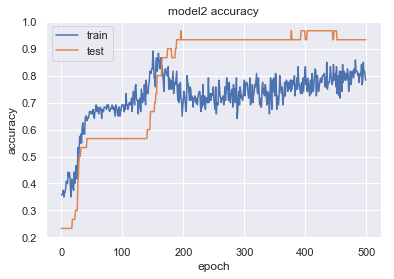

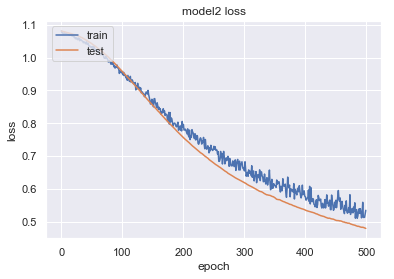

In [13]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Normalize the data before splitting it train test and validation set.
data = data.sample(frac=1).reset_index(drop=True)
data.iloc[:,:-1] = normalize(data.iloc[:,:-1].values,axis=0)

train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

# Split the data into train test and validation sets.
train_x = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values

test_x = test.iloc[:,:-1].values
test_y = test.iloc[:,-1].values

validate_x = validate.iloc[:,:-1].values
validate_y = validate.iloc[:,-1].values

# Convert the label to a understandable format for tensorflow
le = preprocessing.LabelEncoder()
le.fit(train_y)

train_label = le.transform(train_y)
train_y = tf.keras.utils.to_categorical(train_label,num_classes=3)

test_label = le.transform(test_y)
test_y = tf.keras.utils.to_categorical(test_label,num_classes=3)

validate_label = le.transform(validate_y)
validate_y = tf.keras.utils.to_categorical(validate_label, num_classes=3)

# What about another activation function
Usually Rectified Linear Unit (ReLU) is a good choice as activation function. In the example below we use the sigmoid function instead. Look at at the curves of the history and the accuracy and see how they compare with the curves above whe ReLU is used.

In [15]:
model_sigmoid =tf.keras.Sequential()
model_sigmoid.add(tf.keras.layers.Dense(200,input_dim=4,activation='sigmoid'))
model_sigmoid.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model_sigmoid.add(tf.keras.layers.Dense(3,activation='softmax'))
model_sigmoid.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history_sigmaid = model_sigmoid.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 2ms/sample - loss: 1.1301 - acc: 0.2917 - val_loss: 1.1347 - val_acc: 0.3333
Epoch 2/300
120/120 [==============================] - 0s 108us/sample - loss: 1.1134 - acc: 0.3667 - val_loss: 1.1915 - val_acc: 0.2333
Epoch 3/300
120/120 [==============================] - 0s 108us/sample - loss: 1.1138 - acc: 0.3333 - val_loss: 1.0880 - val_acc: 0.4333
Epoch 4/300
120/120 [==============================] - 0s 133us/sample - loss: 1.1059 - acc: 0.3250 - val_loss: 1.1102 - val_acc: 0.3333
Epoch 5/300
120/120 [==============================] - 0s 96us/sample - loss: 1.1023 - acc: 0.3583 - val_loss: 1.1073 - val_acc: 0.2333
Epoch 6/300
120/120 [==============================] - 0s 108us/sample - loss: 1.0979 - acc: 0.3583 - val_loss: 1.1264 - val_acc: 0.2333
Epoch 7/300
120/120 [==============================] - 0s 115us/sample - loss: 1.0968 - acc: 0.3583 - val_loss: 1.1315 - val_acc: 0.2333

Epoch 60/300
120/120 [==============================] - 0s 100us/sample - loss: 1.0658 - acc: 0.6667 - val_loss: 1.1081 - val_acc: 0.2333
Epoch 61/300
120/120 [==============================] - 0s 100us/sample - loss: 1.0733 - acc: 0.3583 - val_loss: 1.1029 - val_acc: 0.2333
Epoch 62/300
120/120 [==============================] - 0s 108us/sample - loss: 1.0649 - acc: 0.3667 - val_loss: 1.0458 - val_acc: 0.4333
Epoch 63/300
120/120 [==============================] - 0s 98us/sample - loss: 1.0650 - acc: 0.5250 - val_loss: 1.0613 - val_acc: 0.5667
Epoch 64/300
120/120 [==============================] - 0s 116us/sample - loss: 1.0570 - acc: 0.4833 - val_loss: 1.0839 - val_acc: 0.4000
Epoch 65/300
120/120 [==============================] - 0s 116us/sample - loss: 1.0629 - acc: 0.4833 - val_loss: 1.0901 - val_acc: 0.2333
Epoch 66/300
120/120 [==============================] - 0s 100us/sample - loss: 1.0617 - acc: 0.3583 - val_loss: 1.0844 - val_acc: 0.5667
Epoch 67/300
120/120 [=============

120/120 [==============================] - 0s 91us/sample - loss: 0.8256 - acc: 0.9083 - val_loss: 0.8023 - val_acc: 0.9000
Epoch 120/300
120/120 [==============================] - 0s 91us/sample - loss: 0.8368 - acc: 0.9167 - val_loss: 0.8082 - val_acc: 0.9000
Epoch 121/300
120/120 [==============================] - 0s 83us/sample - loss: 0.8230 - acc: 0.7250 - val_loss: 0.8431 - val_acc: 0.4667
Epoch 122/300
120/120 [==============================] - 0s 83us/sample - loss: 0.8205 - acc: 0.6167 - val_loss: 0.7601 - val_acc: 0.7667
Epoch 123/300
120/120 [==============================] - 0s 92us/sample - loss: 0.7970 - acc: 0.7583 - val_loss: 0.7984 - val_acc: 0.8000
Epoch 124/300
120/120 [==============================] - 0s 100us/sample - loss: 0.7974 - acc: 0.7083 - val_loss: 0.8153 - val_acc: 0.5667
Epoch 125/300
120/120 [==============================] - 0s 97us/sample - loss: 0.7839 - acc: 0.8333 - val_loss: 0.7487 - val_acc: 0.9000
Epoch 126/300
120/120 [========================

120/120 [==============================] - 0s 698us/sample - loss: 0.4285 - acc: 0.9583 - val_loss: 0.4074 - val_acc: 0.9333
Epoch 179/300
120/120 [==============================] - 0s 75us/sample - loss: 0.4155 - acc: 0.9667 - val_loss: 0.4330 - val_acc: 0.8667
Epoch 180/300
120/120 [==============================] - 0s 83us/sample - loss: 0.4115 - acc: 0.9583 - val_loss: 0.4353 - val_acc: 0.8667
Epoch 181/300
120/120 [==============================] - 0s 91us/sample - loss: 0.4092 - acc: 0.9750 - val_loss: 0.4118 - val_acc: 0.9000
Epoch 182/300
120/120 [==============================] - 0s 100us/sample - loss: 0.4036 - acc: 0.9750 - val_loss: 0.4072 - val_acc: 0.9000
Epoch 183/300
120/120 [==============================] - 0s 100us/sample - loss: 0.3992 - acc: 0.9833 - val_loss: 0.4131 - val_acc: 0.9000
Epoch 184/300
120/120 [==============================] - 0s 91us/sample - loss: 0.4052 - acc: 0.9333 - val_loss: 0.4135 - val_acc: 0.8667
Epoch 185/300
120/120 [======================

120/120 [==============================] - 0s 104us/sample - loss: 0.2334 - acc: 0.9750 - val_loss: 0.2707 - val_acc: 0.9000
Epoch 238/300
120/120 [==============================] - 0s 116us/sample - loss: 0.2324 - acc: 0.9667 - val_loss: 0.2791 - val_acc: 0.9000
Epoch 239/300
120/120 [==============================] - 0s 108us/sample - loss: 0.2269 - acc: 0.9667 - val_loss: 0.2577 - val_acc: 0.8667
Epoch 240/300
120/120 [==============================] - 0s 96us/sample - loss: 0.2311 - acc: 0.9750 - val_loss: 0.2642 - val_acc: 0.9000
Epoch 241/300
120/120 [==============================] - 0s 91us/sample - loss: 0.2284 - acc: 0.9500 - val_loss: 0.2903 - val_acc: 0.8667
Epoch 242/300
120/120 [==============================] - 0s 83us/sample - loss: 0.2195 - acc: 0.9833 - val_loss: 0.2532 - val_acc: 0.8667
Epoch 243/300
120/120 [==============================] - 0s 100us/sample - loss: 0.2250 - acc: 0.9833 - val_loss: 0.2556 - val_acc: 0.9000
Epoch 244/300
120/120 [=====================

120/120 [==============================] - 0s 91us/sample - loss: 0.1489 - acc: 0.9750 - val_loss: 0.2205 - val_acc: 0.9000
Epoch 297/300
120/120 [==============================] - 0s 90us/sample - loss: 0.1465 - acc: 0.9750 - val_loss: 0.2166 - val_acc: 0.9000
Epoch 298/300
120/120 [==============================] - 0s 116us/sample - loss: 0.1488 - acc: 0.9833 - val_loss: 0.2081 - val_acc: 0.9000
Epoch 299/300
120/120 [==============================] - 0s 108us/sample - loss: 0.1550 - acc: 0.9750 - val_loss: 0.1974 - val_acc: 0.8667
Epoch 300/300
120/120 [==============================] - 0s 100us/sample - loss: 0.1459 - acc: 0.9833 - val_loss: 0.2483 - val_acc: 0.8667


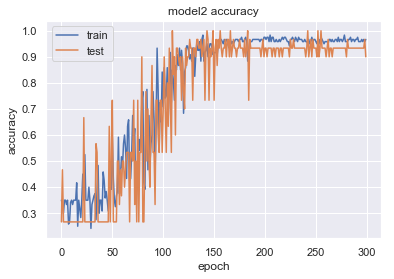

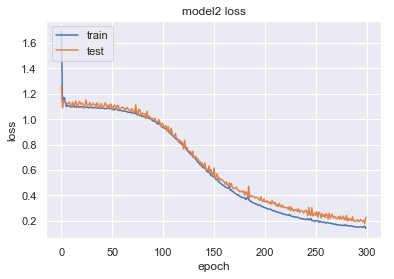

In [35]:
# summarize history for accuracy
plt.plot(history_sigmaid.history['acc'])
plt.plot(history_sigmaid.history['val_acc'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_sigmaid.history['loss'])
plt.plot(history_sigmaid.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
import numpy as np
predicted_test = np.argmax(model_sigmoid.predict(test_x),axis=1)

predicted_validation = np.argmax(model_sigmoid.predict(validate_x),axis=1)
predicted_train = np.argmax(model_sigmoid.predict(train_x),axis=1)

print('True test : ', np.argmax(test_y,axis=1))
print('Pred test : ', predicted_test)
print()
print('True val  : ', np.argmax(validate_y,axis=1))
print('Pred val  : ', predicted_validation)
print()
print('True train: ', np.argmax(train_y,axis=1)[:30])
print('Pred train: ', predicted_train[:30])


True test :  [2 1 1 2 2 1 1 1 0 0 2 2 2 0 0 1 2 1 2 1 2 2 2 1 0 1 0 2 1 1]
Pred test :  [2 1 1 2 1 1 1 1 0 0 1 1 2 0 0 1 2 1 2 1 2 2 2 1 0 1 0 1 1 1]

True val  :  [1 0 2 1 0 2 0 1 2 0 2 2 2 1 1 2 0 0 1 1 1 0 0 2 0 0 2 1 0 1]
Pred val  :  [1 0 2 1 0 2 0 1 2 0 2 2 2 1 1 2 0 0 1 1 1 0 0 2 0 0 2 1 0 1]

True train:  [1 0 2 0 1 2 0 1 2 0 2 2 0 1 1 1 1 0 2 0 2 0 2 1 1 0 0 2 0 2]
Pred train:  [1 0 2 0 1 2 0 1 2 0 2 2 0 1 1 1 1 0 2 0 2 0 2 1 1 0 0 1 0 2]


In [17]:
test['Prediction']=predicted_test==np.argmax(test_y,axis=1)

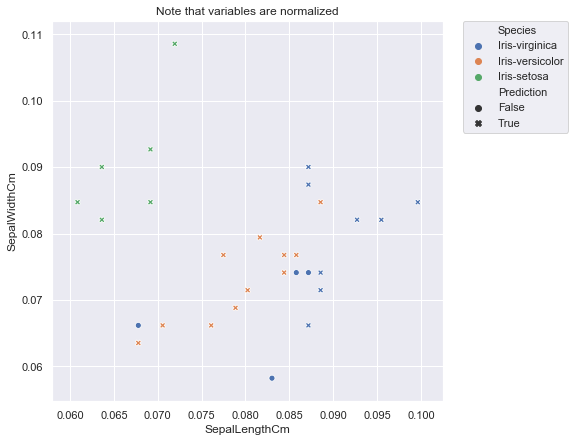

In [18]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Note that variables are normalized')
sns.scatterplot(test.SepalLengthCm, test.SepalWidthCm, hue=test.Species, style=test.Prediction, legend='full' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##  Own work
Investigate how well the model predicts the training data and validation data

1. Make a new column in dataframe `train` and `validate` with the predicted value.
2. Plot each spicie with a different color and mark them with different markers if prediction is correct or not.

# Other algorithms
Random forest is another method in ML. The procedure for doing RF or NN is pretty similar and the results in this case is rather comparable. But notice that the time needed to train RF is significant shorter.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(n_estimators =100)
clf.fit(train_x, train_y)
print('RF pred test: ', np.argmax(clf.predict(test_x),axis=1))
print('NN pred test: ', predicted_test)
print('True    test: ', np.argmax(test_y,axis=1))
print()
print('RF pred valid: ', np.argmax(clf.predict(validate_x),axis=1))
print('NN pred valid: ',  predicted_validation)
print('True    valid: ', np.argmax(validate_y,axis=1))


RF pred test:  [2 1 1 2 1 1 1 1 0 0 2 1 2 0 0 1 2 1 2 1 2 2 2 1 0 1 0 1 1 1]
NN pred test:  [2 1 1 2 1 1 1 1 0 0 1 1 2 0 0 1 2 1 2 1 2 2 2 1 0 1 0 1 1 1]
True    test:  [2 1 1 2 2 1 1 1 0 0 2 2 2 0 0 1 2 1 2 1 2 2 2 1 0 1 0 2 1 1]

RF pred valid:  [1 0 2 1 0 2 0 1 2 0 2 2 2 1 1 2 0 0 1 1 1 0 0 2 0 0 2 1 0 1]
NN pred valid:  [1 0 2 1 0 2 0 1 2 0 2 2 2 1 1 2 0 0 1 1 1 0 0 2 0 0 2 1 0 1]
True    valid:  [1 0 2 1 0 2 0 1 2 0 2 2 2 1 1 2 0 0 1 1 1 0 0 2 0 0 2 1 0 1]
